Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

**Created a clean copy of submission to not confuse my variables and not have issues with the length of my data not matching the length of submission.**

# Random Forests

## Assignment
- [x] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [x] Continue to participate in our Kaggle challenge.
- [x] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [x] Try Ordinal Encoding.
- [x] Try a Random Forest Classifier.
- [x] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [x] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [x] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [x] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [x] Get and plot your feature importances.
- [x] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape, sample_submission.shape

((59400, 41), (14358, 40), (14358, 2))

## Imports

In [3]:
!pip install category_encoders

In [4]:
# Import

%matplotlib inline
import numpy as np
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

from sklearn.pipeline import make_pipeline
import category_encoders as ce

## Separate Train into Train and Validation

In [5]:
# Train/Validate/Test split the data
train, val = train_test_split(
    train, train_size=0.80, 
    test_size=0.20,
    stratify=train['status_group'], 
    random_state=42
)

train.shape, val.shape, test.shape

((47520, 41), (11880, 41), (14358, 40))

## Data Exploration

In [6]:
train.groupby('quality_group')['status_group'].value_counts(normalize=True)
#seems that good and functional correlate

quality_group  status_group           
colored        functional                 0.496278
               non functional             0.394541
               functional needs repair    0.109181
fluoride       functional                 0.737430
               non functional             0.212291
               functional needs repair    0.050279
good           functional                 0.566407
               non functional             0.356742
               functional needs repair    0.076851
milky          functional                 0.550152
               non functional             0.433131
               functional needs repair    0.016717
salty          non functional             0.485523
               functional                 0.456569
               functional needs repair    0.057909
unknown        non functional             0.841650
               functional                 0.139721
               functional needs repair    0.018629
Name: status_group, dtype: float64

In [7]:
train.groupby('quantity')['status_group'].value_counts(normalize=True)
#Category enough also seems to be an indicator of functionality

quantity      status_group           
dry           non functional             0.967689
              functional                 0.026011
              functional needs repair    0.006300
enough        functional                 0.650920
              non functional             0.276998
              functional needs repair    0.072082
insufficient  functional                 0.521106
              non functional             0.382786
              functional needs repair    0.096108
seasonal      functional                 0.580456
              non functional             0.318434
              functional needs repair    0.101110
unknown       non functional             0.713386
              functional                 0.267717
              functional needs repair    0.018898
Name: status_group, dtype: float64

## Feature Engineerng/Wrangle

In [8]:
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d

In [9]:
def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()

    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                        'population', 'gps_height']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (all the same), id (can't glean useful info), num_private(mostly 0s)
    unused = ['recorded_by']
    X = X.drop(columns=unused)

    # Changing region and district code into categories rather than ints
    X['region_code'] = X['region_code'].astype('str')
    X['district_code'] = X['district_code'].astype('str')

    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
   
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns='date_recorded')
    
    #binning construction_years
    cut_bins = [0, 1, 1960, 1970, 1980, 1990, 2000, 2010, 2013]
    X['construction_bin'] = pd.cut(x=X['construction_year'], bins= cut_bins, include_lowest=True, duplicates='raise').values.add_categories('missing')
    X['construction_bin']=X['construction_bin'].fillna('missing')
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years_till_check'] = X['year_recorded'] - X['construction_year']

    # Engineer feature: Age of waterpoint
    X['age'] = 2013 - X['construction_year']

    # Engineer feature: Water quality and quantity
    X['good_enough'] = ((X['quality_group'] == 'good') & (X['quantity'] == 'enough')).astype(int)
    
    # Engineer feature: Using lat and long features
    # Trying two ways to use the lat and long - haversine and 
    # https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature
    # see which one works better for model
    X['x'] = np.cos(X['latitude']) * np.cos(X['longitude'])
    X['y'] = np.cos(X['latitude']) * np.sin(X['longitude'])
    X['z'] = np.sin(X['latitude'])

    # Engineer feature: Haversine point
    X['harvesine_distance'] = [single_pt_haversine(latitude, longitude) for latitude, longitude in zip(X['latitude'], X['longitude'])]

    # Eeturn the wrangled dataframe
    return X

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [10]:
train.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,month_recorded,day_recorded,construction_bin,years_till_check,age,good_enough,x,y,z,harvesine_distance
43360,72938,0.0,NaN,NaN,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,...,7,27,missing,NaN,NaN,0,0.511529,-0.822878,-0.247405,3851.011839
7263,65358,500.0,Rc Church,2049.0,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,...,3,23,"(2000.0, 2010.0]",3.0,5.0,1,0.987440,0.107301,-0.115969,3974.353666
2486,469,25.0,Donor,290.0,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,...,3,7,"(2000.0, 2010.0]",1.0,3.0,0,0.853418,0.510933,0.103083,4298.700619
313,1298,0.0,Government Of Tanzania,NaN,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,...,7,31,missing,NaN,NaN,1,0.212792,-0.178941,-0.960573,3418.256966
52726,27001,0.0,Water,NaN,Gove,35.389331,-6.399942,Chama,0,Internal,...,3,10,missing,NaN,NaN,1,-0.668952,-0.734121,-0.116492,3990.664724


## Models

### Features

In [11]:
# Select features

# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.drop('id').tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality.index.tolist()

# Combine the lists 
features = numeric_features + categorical_features
print(features)
print(len(features))

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year', 'year_recorded', 'month_recorded', 'day_recorded', 'years_till_check', 'age', 'good_enough', 'x', 'y', 'z', 'harvesine_distance', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'public_meeting', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'longitude_MISSING', 'latitude_MISSING', 'construction_year_MISSING', 'population_MISSING', 'gps_height_MISSING', 'construction_bin']
51


In [12]:
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

### Binary Encoder and XGBoost

In [13]:
%%time
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xg = make_pipeline(
    ce.BinaryEncoder(),   
    XGBClassifier(max_depth=15, eta=0.3, n_estimators=1000, 
                  n_jobs=-1, min_child_weight=1, subsample=0.9, 
                  colsample_bytree=0.9, objective='multi:softmax', 
                  eval_metric='merror', gamma=0, scale_pos_weight=1, 
                  seed=42, verbose_eval=True)
)

# Fit on train
xg.fit(X_train, y_train)


# Score on val
print('Train Accuracy:', xg.score(X_train, y_train))
print('Validation Accuracy:', xg.score(X_val, y_val))

Train Accuracy: 0.9999789562289563
Validation Accuracy: 0.813047138047138
CPU times: user 2h 16min 31s, sys: 53.9 s, total: 2h 17min 25s
Wall time: 41min 53s


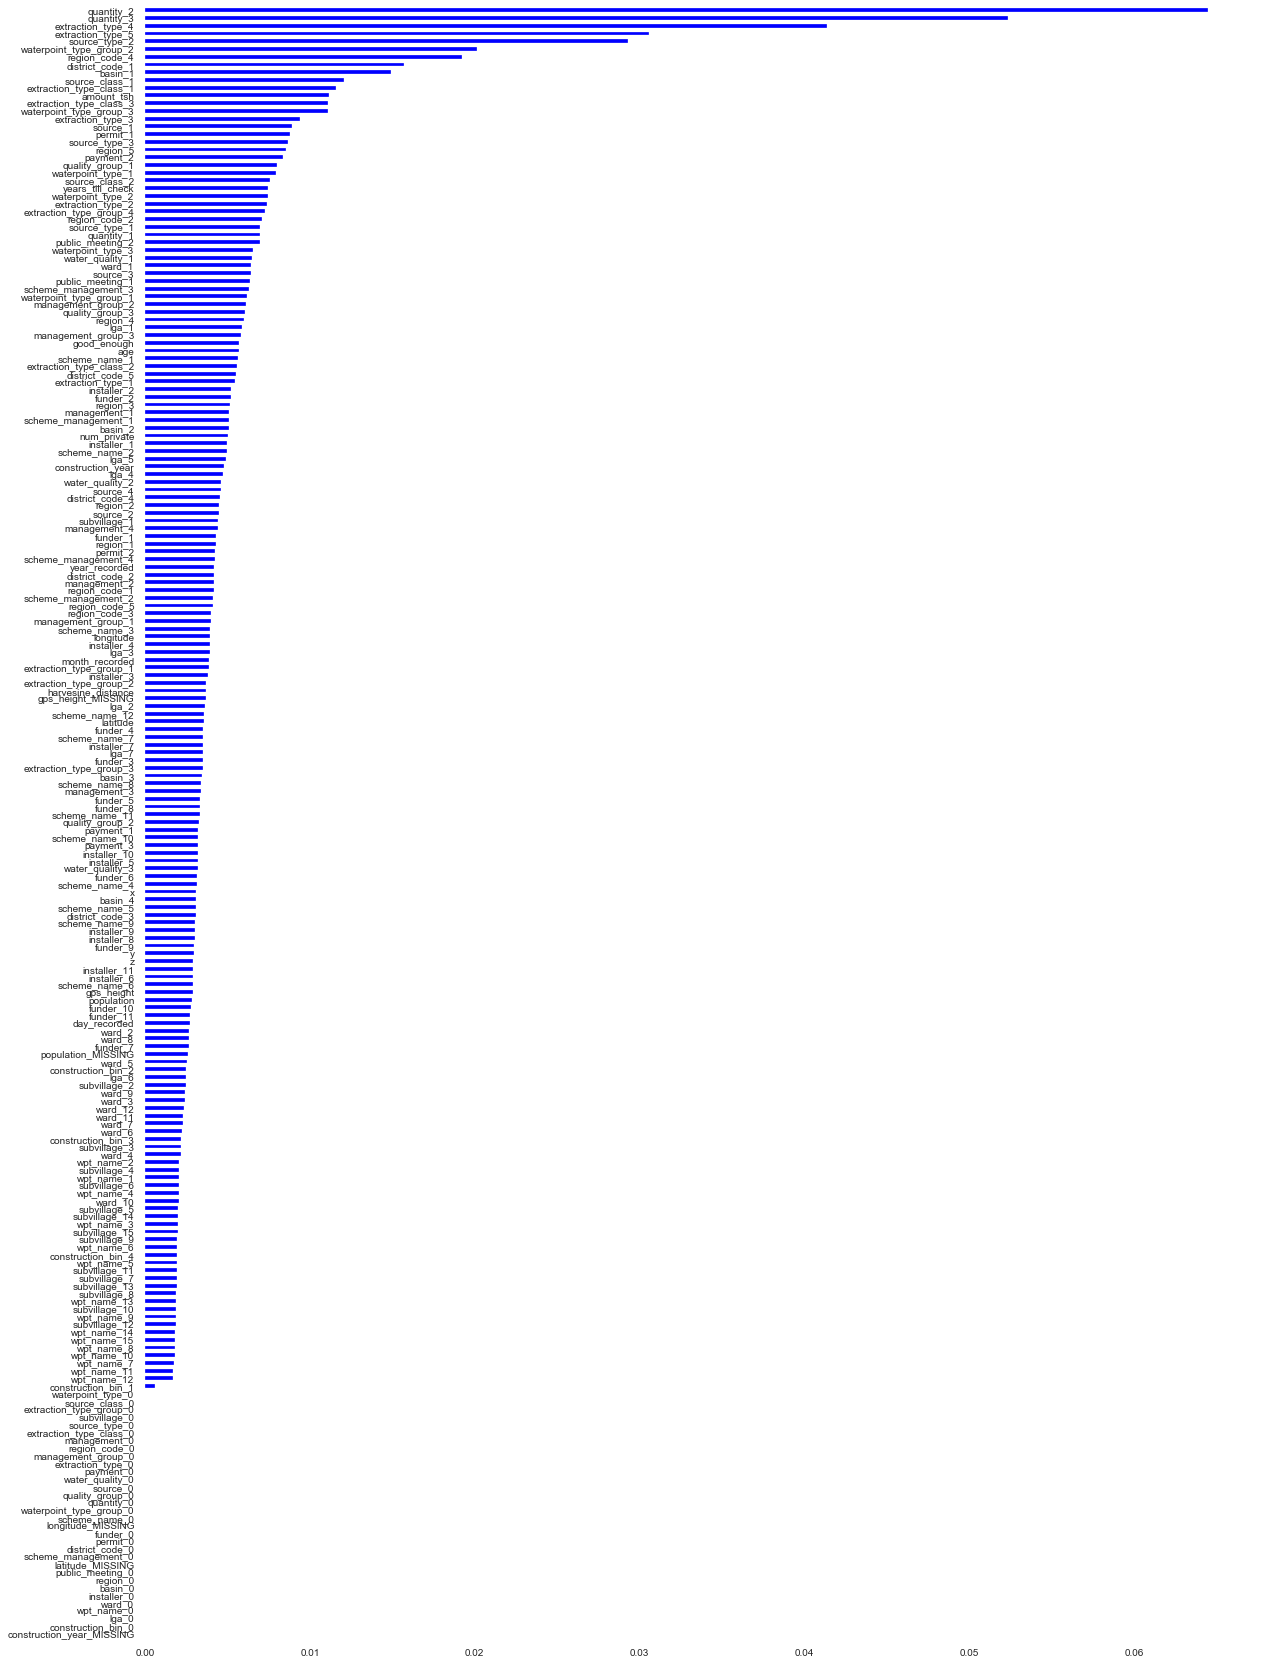

In [14]:
# Plot the feature importances
model = xg.named_steps['xgbclassifier']
encoder = xg.named_steps['binaryencoder']
encoded_columns = encoder.fit_transform(X_train).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(20,30))
importances.sort_values().plot.barh(color='blue');

In [15]:
assert all(X_train.columns == X_test.columns)

In [16]:
# Predict on test
y_pred = xg.predict(X_test)
y_pred.shape

(14358,)

In [17]:
#Write a submission csv file

submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('Obukwelu_DSPT5_Unit_2_submission3.csv', index=False)

In [18]:
submission.head()

,id,status_group
0,50785,functional
1,51630,functional
2,17168,functional
3,45559,non functional
4,49871,functional


In [19]:
submission.shape

(14358, 2)